# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
# Importing LIbraries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
#First dataset
#reading twitter archive data
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive_df.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
#Second Dataset - Tweet image Predictions
#Download image_predictions file programmatically using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3]:
# Third dataset twitter json file
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)


2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
import json

In [5]:
all_tweets = []
# Set the column row
columns = ['tweet_id', 'retweet_count', 'favorite_count']
with open('tweet-json.txt', 'r') as file:
    for tweet in file:
        extracts = []
        # Try converting each line of tweet data into a string object
        try:
            json_tweet = json.loads(tweet)
            # Extract relevant data and append to extracts list
            id_ = json_tweet["id_str"]
            retweets = json_tweet["retweet_count"]
            favorites = json_tweet["favorite_count"]
            extracts.append(id_)
            extracts.append(retweets)
            extracts.append(favorites)
            # Add list to list of tweets
            all_tweets.append(extracts)
        except:
            pass

In [6]:
len(all_tweets)

2354

In [7]:
# create DataFrame and read json file into the dataframe
json_df = pd.DataFrame(all_tweets, columns=columns)
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data


In [8]:
#Assessing first dataset twitter_archive_df
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1196,717047459982213120,NaN,NaN,2016-04-04 17:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio (pronounced Baxter). He's a Ben...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,None,None,None,None
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She got in trouble. One h*ck of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824297048...,11,10,Nala,None,None,None,None
491,813800681631023104,NaN,NaN,2016-12-27 17:36:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,None,None,None,None
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None,None,None,None
1599,686034024800862208,NaN,NaN,2016-01-10 03:57:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Your fav crew is back and this time they're em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686034024...,12,10,None,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,None,None,None
66,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,None,None,None


In [13]:
twitter_archive_df.tweet_id.duplicated().any()

False

In [14]:
twitter_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Toby          7
Bailey        7
Daisy         7
Dave          6
Oscar         6
Scout         6
Rusty         6
Koda          6
Milo          6
Bella         6
Jack          6
Jax           6
Leo           6
Stanley       6
Bentley       5
           ... 
Darrel        1
Stuart        1
Rolf          1
Nida          1
Storkson      1
Opie          1
Amber         1
Mojo          1
Rontu         1
Combo         1
Malikai       1
life          1
Noosh         1
Pluto         1
Sully         1
Harry         1
Strudel       1
Kayla         1
all           1
Kona          1
Rueben        1
Mairi         1
Bayley        1
Peanut        1
Chesney       1
Tassy         1
Rodney        1
Bauer         1
Tebow         1
Orion         1
Name: name, Length: 957,

In [15]:
twitter_archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [16]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
#Accessing second dataset image_predictions_df
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1193,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True
2012,879050749262655488,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,1,tabby,0.311861,False,window_screen,0.169123,False,Egyptian_cat,0.132932,False
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True


In [22]:
image_predictions_df.tweet_id.duplicated().any()

False

In [23]:
image_predictions_df.jpg_url.duplicated().any()

True

In [24]:
#total number of duplicated urls
sum(image_predictions_df.jpg_url.duplicated())


66

In [25]:
#Accessing third dataset json_df
json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [26]:
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
json_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [28]:
json_df.sample(15)

,tweet_id,retweet_count,favorite_count
371,828381636999917570,2554,13864
704,785639753186217984,2561,8735
1438,696886256886657024,2016,5317
1504,691756958957883396,1161,3179
2316,666454714377183233,223,545
617,796177847564038144,16628,0
235,847251039262605312,4800,22036
2142,669942763794931712,183,536
817,770655142660169732,2013,8130
15,889278841981685760,5637,25652


In [29]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [30]:
json_df.tweet_id.duplicated().any()

False

### Quality issues
#### Twitter archive data

1. Wrong datatype for the tweet_id column, timestamp and source column


2. Invalid names found in the name column such as (a,an, o, my, his, this, all, old, the, not, one, quite).


3. Null entries for name represented as None instead of NaN.


4. The entries of source is dirty.


5. The retweets are not needed as specified in the project specification.


6. Ratings should be in one columnn.

#### Image prediction data 

7. (66) jpg_urls are duplicated.


8. Entries in column P1 P2 P3 is not consistent case wise of dog breeds and underscore is used instead of space.



 

### Tidiness issues
1. columns cntaining the dog stages(floofer, doggo,pupper, puppo) should be put into one column


2. The three data sets should be merged into one

## Cleaning Data

In [31]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
json_clean = json_df.copy()

### Issue #1:  Wrong datatype for the tweet_id column, timestamp and source column

#### Define:    Convert to correct datatypes

#### Code

In [32]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), 

### Issue #2:  Invalid names found in the name column such as (a,an, o, my, his, this, all, old, the, not, one, quite).

#### Define : Replace invalid names with Nan

#### Code

In [34]:
invalidnames = [ 'a', 'an', 'o', 'an', 'my', 'his', 'this', 'all', 'old', 'the', 'not', 'one', 'quite']

for word in invalidnames:
    twitter_archive_clean.loc[twitter_archive_clean['name']  == word , 'name'] = np.nan

#### Test

In [35]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', nan,
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo',
       'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', '

In [36]:
twitter_archive_clean.name.value_counts()

None            745
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
Sadie             8
Toby              7
Bailey            7
Daisy             7
Buddy             7
Jax               6
Milo              6
Oscar             6
Koda              6
Dave              6
Leo               6
Bella             6
Scout             6
Rusty             6
Stanley           6
Jack              6
Oakley            5
Sunny             5
Finn              5
Sammy             5
               ... 
Remus             1
Dewey             1
Nimbus            1
Rover             1
Timber            1
Wishes            1
Laika             1
Edmund            1
Gerbald           1
Petrick           1
Rey               1
Kulet             1
Fwed              1
Eevee             1
Sobe              1
Vixen             1
unacceptable      1
Rumpole           1
Wesley            1


In [37]:
twitter_archive_clean['name'].isnull().sum()

85

### Issue #3:  Null entries for name represented as None instead of NaN.

#### Define : Replace None in the name column with NaN

#### Code

In [38]:
twitter_archive_clean['name'].replace('None', np.nan, inplace = True)

#### Test

In [39]:
twitter_archive_clean['name'].isnull().sum()

830

### Issue #4: The entries of source is dirty.

#### Define :  Extract the sources from the string

#### Code

In [40]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [41]:
twitter_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #5: The retweets  are not needed as specified in the project specification.

#### Define : Delete thre retweets and drop the retweet column as they will not be need as specified in the project

#### Code

In [42]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

twitter_archive_clean.drop(['retweeted_status_id', 
                           'retweeted_status_user_id', 
                           'retweeted_status_timestamp'], 
                          axis=1, inplace=True)

#### Test

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1412 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


###  issues #6. Ratings should be in one columnn.

#### Define: Create a variable for ratings and calculate a single value

#### Code

In [44]:
twitter_archive_clean['rating']=twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator
twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1 ,inplace=True)

#### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     1412 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
rating                   2175 non-null float64
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 237.9+ KB


### Issue #7: (66) jpg_urls are duplicated.

#### Define : Drop  the jpg_url duplicates and keep one

#### Code

In [46]:
image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace= True)

#### Test

In [47]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

### Issue #8:  Entries in column P1 P2 P3 is not consistent case wise of dog breeds and underscore is used instead of space.

#### Define :  Make the entries in column p1, p2, p3 lowercase for consistecy and replace underscore with space

#### Code

In [48]:
#Change predicted dog names to lower case
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#replace underscore with space
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_',' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_',' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_',' ')


#### Test

In [49]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Wrong datatype for tweet_id column

#### Define: Convert the tweet_id column to string

#### Code

In [50]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [51]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### Tidiness issues #1. columns cntaining the dog stages(floofer, doggo,pupper, puppo) should be put into one column

#### Define: Create a new variable for the dog stages in order to categorise them and drop the individual column

#### Code

In [52]:
#create a new variable
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [53]:
#Drop original columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)


#### Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     1412 non-null object
rating                   2175 non-null float64
dog_stage                364 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 186.9+ KB


In [55]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
1261,710153181850935296,NaN,NaN,2016-03-16 17:18:07,Twitter for iPhone,This is Lacy. She's tipping her hat to you. Da...,https://twitter.com/dog_rates/status/710153181...,Lacy,1.1,NaN
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58,Twitter for iPhone,Meet Stanley. He likes road trips. Will shift ...,https://twitter.com/dog_rates/status/869702957...,Stanley,1.3,NaN
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51,Twitter for iPhone,This is Klevin. He laughs a lot. Very cool dog...,https://twitter.com/dog_rates/status/667012601...,Klevin,0.9,NaN
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01,Twitter for iPhone,This is Jerry. He's a great listener. Low main...,https://twitter.com/dog_rates/status/670733412...,Jerry,0.8,NaN
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55,Twitter for iPhone,This is Spencer. He's part of the Queen's Guar...,https://twitter.com/dog_rates/status/759047813...,Spencer,1.1,NaN
2188,668975677807423489,NaN,NaN,2015-11-24 02:13:25,Twitter for iPhone,This is Jeremy. He hasn't grown into his skin ...,https://twitter.com/dog_rates/status/668975677...,Jeremy,1.1,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,NaN,1.2,pupper
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57,Twitter for iPhone,Atlas is back and this time he's got doggles. ...,https://twitter.com/dog_rates/status/788178268...,NaN,1.3,NaN
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09,Twitter Web Client,You need to watch these two doggos argue throu...,https://twitter.com/dog_rates/status/772877495...,NaN,1.1,doggo
1472,693942351086120961,NaN,NaN,2016-01-31 23:42:03,Twitter for iPhone,This is Kobe. He's a Speckled Rorschach. Reque...,https://twitter.com/dog_rates/status/693942351...,Kobe,1.0,NaN


### Tidiness issues #2. The three data sets should be merged into one

#### Define: Merge the three datasets into

#### Code

In [56]:
# First join  the 3 dataset together
# Join twitter_archive_clean with json_clean on tweet_id
df = pd.merge(twitter_archive_clean, json_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Join merge with prediction_clean
df_clean = pd.merge(df, image_predictions_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

#### Test

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 23 columns):
tweet_id                 1928 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1928 non-null datetime64[ns]
source                   1928 non-null object
text                     1928 non-null object
expanded_urls            1928 non-null object
name                     1320 non-null object
rating                   1928 non-null float64
dog_stage                317 non-null object
retweet_count            1928 non-null int64
favorite_count           1928 non-null int64
jpg_url                  1928 non-null object
img_num                  1928 non-null int64
p1                       1928 non-null object
p1_conf                  1928 non-null float64
p1_dog                   1928 non-null bool
p2                       1928 non-null object
p2_conf                  1928 non-null float64
p2_dog          

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [59]:
# save the data as TWitter_archive_master.csv archive 
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [60]:
#checking if the data has been save  and loading it into a df
df=pd.read_csv('twitter_archive_master.csv')

In [61]:
# df check
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,6514,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,4328,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,8964,42908,...,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,9774,41048,...,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 21 columns):
tweet_id          1928 non-null int64
timestamp         1928 non-null object
source            1928 non-null object
text              1928 non-null object
expanded_urls     1928 non-null object
name              1320 non-null object
rating            1928 non-null float64
dog_stage         317 non-null object
retweet_count     1928 non-null int64
favorite_count    1928 non-null int64
jpg_url           1928 non-null object
img_num           1928 non-null int64
p1                1928 non-null object
p1_conf           1928 non-null float64
p1_dog            1928 non-null bool
p2                1928 non-null object
p2_conf           1928 non-null float64
p2_dog            1928 non-null bool
p3                1928 non-null object
p3_conf           1928 non-null float64
p3_dog            1928 non-null bool
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 276.9+ KB


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [63]:
#loading the new data
twitter=pd.read_csv('twitter_archive_master.csv')
twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,6514,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,4328,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,8964,42908,...,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,9774,41048,...,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [64]:
#checking the information of the dataset
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 21 columns):
tweet_id          1928 non-null int64
timestamp         1928 non-null object
source            1928 non-null object
text              1928 non-null object
expanded_urls     1928 non-null object
name              1320 non-null object
rating            1928 non-null float64
dog_stage         317 non-null object
retweet_count     1928 non-null int64
favorite_count    1928 non-null int64
jpg_url           1928 non-null object
img_num           1928 non-null int64
p1                1928 non-null object
p1_conf           1928 non-null float64
p1_dog            1928 non-null bool
p2                1928 non-null object
p2_conf           1928 non-null float64
p2_dog            1928 non-null bool
p3                1928 non-null object
p3_conf           1928 non-null float64
p3_dog            1928 non-null bool
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 276.9+ KB


In [65]:
#taking statistics of each column
twitter.describe()

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1.928000e+03
mean,7.350055e+17,1.168508,2514.632261,8296.298237,1.201763,0.593835,1.338761e-01,6.008588e-02
std,6.772207e+16,4.136082,4187.214895,11371.277140,0.558240,0.273084,1.006528e-01,5.083543e-02
min,6.660209e+17,0.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.756636e+17,1.000000,611.750000,1873.750000,1.000000,0.360137,5.378615e-02,1.605498e-02
50%,7.073465e+17,1.100000,1299.000000,3904.000000,1.000000,0.587635,1.163795e-01,4.952715e-02
75%,7.862663e+17,1.200000,2911.250000,10280.000000,1.000000,0.848562,1.943738e-01,9.130702e-02
max,8.924206e+17,177.600000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [66]:
#change datatype of tweet_id, timestamp, source, dog stage 
twitter['tweet_id'] = twitter['tweet_id'].astype(str)
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'])
twitter['source'] = twitter['source'].astype('category')
twitter['dog_stages'] = twitter['dog_stage'].astype('category')

In [67]:
#confirm the changes of datatypes
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 22 columns):
tweet_id          1928 non-null object
timestamp         1928 non-null datetime64[ns]
source            1928 non-null category
text              1928 non-null object
expanded_urls     1928 non-null object
name              1320 non-null object
rating            1928 non-null float64
dog_stage         317 non-null object
retweet_count     1928 non-null int64
favorite_count    1928 non-null int64
jpg_url           1928 non-null object
img_num           1928 non-null int64
p1                1928 non-null object
p1_conf           1928 non-null float64
p1_dog            1928 non-null bool
p2                1928 non-null object
p2_conf           1928 non-null float64
p2_dog            1928 non-null bool
p3                1928 non-null object
p3_conf           1928 non-null float64
p3_dog            1928 non-null bool
dog_stages        317 non-null category
dtypes: bool(3), category(2), 

### Which source is used for the tweeting of the weRateDogs program?

In [68]:
#checking the source used most for the tweet program
twitter.source.value_counts()

Twitter for iPhone    1891
Twitter Web Client      26
TweetDeck               11
Name: source, dtype: int64

From the output it can be seen that the twitter fo iphone is the highest source used for tweeting in this program.

### Which tweet has the highest favorite count and the tweet that has the highest retweet.

In [69]:
twitter.nlargest(15,['favorite_count'])

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
304,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,1.3,puppo,48265,132810,...,lakeland terrier,0.196015,True,labrador retriever,0.160329,True,irish terrier,0.069126,True,puppo
733,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,1.3,doggo,79515,131075,...,labrador retriever,0.825333,True,ice bear,0.044681,False,whippet,0.018442,True,doggo
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,1.3,NaN,45849,107956,...,english springer,0.383404,True,boston bull,0.134967,True,cardigan,0.110481,True,NaN
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,1.3,pupper,32883,106827,...,french bulldog,0.905334,True,boston bull,0.078060,True,pug,0.001771,True,pupper
92,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,1.3,NaN,27680,85011,...,golden retriever,0.841001,True,great pyrenees,0.099278,True,labrador retriever,0.032621,True,NaN
133,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,NaN,1.2,NaN,25661,75193,...,angora,0.224218,False,malamute,0.216163,True,persian cat,0.128383,False,NaN
765,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,NaN,1.3,doggo,52360,75163,...,eskimo dog,0.503372,True,siberian husky,0.390413,True,malamute,0.080901,True,doggo
64,877736472329191424,2017-06-22 03:54:17,Twitter for iPhone,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,Aja,1.3,NaN,17300,71144,...,chesapeake bay retriever,0.837956,True,labrador retriever,0.062034,True,weimaraner,0.040599,True,NaN
32,884925521741709313,2017-07-12 00:01:00,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,Earl,1.2,NaN,16439,68152,...,italian greyhound,0.259916,True,american staffordshire terrier,0.198451,True,staffordshire bullterrier,0.127725,True,NaN
1424,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,Kenneth,1.0,NaN,31989,67100,...,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,NaN


The tweet_id(822872901745569793) in entry 304 has the number of favorite tweets

.

In [70]:
twitter.nlargest(15,['retweet_count'])

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
733,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,1.3,doggo,79515,131075,...,labrador retriever,0.825333,True,ice bear,0.044681,False,whippet,0.018442,True,doggo
765,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,NaN,1.3,doggo,52360,75163,...,eskimo dog,0.503372,True,siberian husky,0.390413,True,malamute,0.080901,True,doggo
304,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,1.3,puppo,48265,132810,...,lakeland terrier,0.196015,True,labrador retriever,0.160329,True,irish terrier,0.069126,True,puppo
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,1.3,NaN,45849,107956,...,english springer,0.383404,True,boston bull,0.134967,True,cardigan,0.110481,True,NaN
597,761672994376806400,2016-08-05 21:19:27,Twitter for iPhone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,NaN,1.0,NaN,33421,55016,...,gondola,0.318851,False,sea lion,0.306525,False,pool table,0.111565,False,NaN
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,1.3,pupper,32883,106827,...,french bulldog,0.905334,True,boston bull,0.078060,True,pug,0.001771,True,pupper
1424,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,Kenneth,1.0,NaN,31989,67100,...,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,NaN
330,817827839487737858,2017-01-07 20:18:46,Twitter for iPhone,This is Buddy. He ran into a glass door once. ...,https://twitter.com/dog_rates/status/817827839...,Buddy,1.3,NaN,31314,57622,...,cocker spaniel,0.387608,True,golden retriever,0.264844,True,pekinese,0.122123,True,NaN
1366,678399652199309312,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,NaN,1.2,NaN,30742,61794,...,swing,0.929196,False,bedlington terrier,0.015047,True,great pyrenees,0.014039,True,NaN
434,795464331001561088,2016-11-07 03:14:10,Twitter for iPhone,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,NaN,1.3,doggo,27728,55683,...,golden retriever,0.193082,True,chesapeake bay retriever,0.157927,True,soft-coated wheaten terrier,0.124684,True,doggo


The tweet_id(744234799360020481) in entry 733 has the highest number of retweet counts

In [71]:
twitter.nlargest(15,['favorite_count', 'retweet_count'])

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
304,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,1.3,puppo,48265,132810,...,lakeland terrier,0.196015,True,labrador retriever,0.160329,True,irish terrier,0.069126,True,puppo
733,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,1.3,doggo,79515,131075,...,labrador retriever,0.825333,True,ice bear,0.044681,False,whippet,0.018442,True,doggo
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,1.3,NaN,45849,107956,...,english springer,0.383404,True,boston bull,0.134967,True,cardigan,0.110481,True,NaN
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,1.3,pupper,32883,106827,...,french bulldog,0.905334,True,boston bull,0.078060,True,pug,0.001771,True,pupper
92,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,1.3,NaN,27680,85011,...,golden retriever,0.841001,True,great pyrenees,0.099278,True,labrador retriever,0.032621,True,NaN
133,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,NaN,1.2,NaN,25661,75193,...,angora,0.224218,False,malamute,0.216163,True,persian cat,0.128383,False,NaN
765,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,NaN,1.3,doggo,52360,75163,...,eskimo dog,0.503372,True,siberian husky,0.390413,True,malamute,0.080901,True,doggo
64,877736472329191424,2017-06-22 03:54:17,Twitter for iPhone,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,Aja,1.3,NaN,17300,71144,...,chesapeake bay retriever,0.837956,True,labrador retriever,0.062034,True,weimaraner,0.040599,True,NaN
32,884925521741709313,2017-07-12 00:01:00,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,Earl,1.2,NaN,16439,68152,...,italian greyhound,0.259916,True,american staffordshire terrier,0.198451,True,staffordshire bullterrier,0.127725,True,NaN
1424,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,Kenneth,1.0,NaN,31989,67100,...,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,NaN


In [72]:
twitter.favorite_count.value_counts()

1691     3
2706     3
610      3
2176     3
2918     3
345      3
2768     3
1193     2
804      2
1189     2
2903     2
3022     2
3134     2
2937     2
784      2
3084     2
2979     2
1111     2
1074     2
931      2
2243     2
25652    2
2906     2
2892     2
2890     2
833      2
344      2
3153     2
1114     2
2828     2
        ..
26404    1
687      1
4787     1
6776     1
4727     1
2678     1
35400    1
21041    1
4659     1
10804    1
4099     1
68152    1
573      1
6718     1
33345    1
14916    1
2630     1
2634     1
2676     1
2638     1
22349    1
593      1
16983    1
23134    1
4707     1
2662     1
621      1
4719     1
625      1
2056     1
Name: favorite_count, Length: 1785, dtype: int64

In [73]:
twitter.sort_values(by = 'favorite_count', ascending = False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
304,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,1.3,puppo,48265,132810,...,lakeland terrier,0.196015,True,labrador retriever,0.160329,True,irish terrier,0.069126,True,puppo
733,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,1.3,doggo,79515,131075,...,labrador retriever,0.825333,True,ice bear,0.044681,False,whippet,0.018442,True,doggo
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,1.3,NaN,45849,107956,...,english springer,0.383404,True,boston bull,0.134967,True,cardigan,0.110481,True,NaN
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,1.3,pupper,32883,106827,...,french bulldog,0.905334,True,boston bull,0.078060,True,pug,0.001771,True,pupper
92,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,1.3,NaN,27680,85011,...,golden retriever,0.841001,True,great pyrenees,0.099278,True,labrador retriever,0.032621,True,NaN
133,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,NaN,1.2,NaN,25661,75193,...,angora,0.224218,False,malamute,0.216163,True,persian cat,0.128383,False,NaN
765,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,NaN,1.3,doggo,52360,75163,...,eskimo dog,0.503372,True,siberian husky,0.390413,True,malamute,0.080901,True,doggo
64,877736472329191424,2017-06-22 03:54:17,Twitter for iPhone,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,Aja,1.3,NaN,17300,71144,...,chesapeake bay retriever,0.837956,True,labrador retriever,0.062034,True,weimaraner,0.040599,True,NaN
32,884925521741709313,2017-07-12 00:01:00,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,Earl,1.2,NaN,16439,68152,...,italian greyhound,0.259916,True,american staffordshire terrier,0.198451,True,staffordshire bullterrier,0.127725,True,NaN
1424,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,Kenneth,1.0,NaN,31989,67100,...,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,NaN


In [74]:
twitter.groupby('tweet_id')['favorite_count'].value_counts()

tweet_id            favorite_count
666020888022790149  2535              1
666029285002620928  132               1
666033412701032449  128               1
666044226329800704  311               1
666049248165822465  111               1
666050758794694657  136               1
666051853826850816  1253              1
666055525042405380  448               1
666057090499244032  304               1
666058600524156928  115               1
666063827256086533  496               1
666071193221509120  154               1
666073100786774016  335               1
666082916733198337  121               1
666094000022159362  169               1
666099513787052032  164               1
666102155909144576  81                1
666104133288665088  14765             1
666268910803644416  108               1
666273097616637952  184               1
666287406224695296  152               1
666293911632134144  522               1
666337882303524864  204               1
666345417576210432  307               1
66635

### Which name is given to a dog mostly

In [75]:
twitter.name.value_counts()

Charlie         11
Lucy            10
Oliver          10
Cooper          10
Penny            8
Tucker           8
Winston          8
Sadie            8
Toby             7
Daisy            7
Stanley          6
Jax              6
Koda             6
Bella            6
Lola             6
Oscar            5
Chester          5
Buddy            5
Leo              5
Louis            5
Oakley           4
very             4
Scooter          4
Gary             4
Bailey           4
Maggie           4
Bo               4
Jerry            4
Clarence         4
Phil             4
                ..
Noosh            1
Georgie          1
Juckson          1
Kuyu             1
Karll            1
Lulu             1
Huxley           1
Siba             1
Fabio            1
Griswold         1
Pippin           1
Jaycob           1
Zoe              1
Maddie           1
Trigger          1
Blipson          1
Blitz            1
Cermet           1
Brudge           1
Taz              1
Paisley          1
unacceptable

the name CHARLIE is given to dogs mostly

### Which dog stage is mostly common?

In [76]:
twitter.dog_stage.value_counts()

pupper     218
doggo       69
puppo       27
floofer      3
Name: dog_stage, dtype: int64

The dog stage common the most in the tweet is Pupper stage with a total of 218, followed by the dooggo(69) , puppo(27) and floofeer the least with just 3.

### What is the average favorite count of dog stages

In [77]:
avgdpr = twitter.query('dog_stage in ["doggo", "floofer", "puppo", "pupper"]')
dog_stage_fav_avg = avgdpr.groupby('dog_stage')['favorite_count'].mean()
dog_stage_fav_avg

dog_stage
doggo      15870.579710
floofer    22929.000000
pupper      6706.977064
puppo      22912.925926
Name: favorite_count, dtype: float64

The FLoffer(22929) dog stage has the highest average favorite count despite just being 3 observations,
followed by the Puppo(22912.925926), then Doggo(15870.579710) and pupper(6706.977064).

### What is the average rating of dog stages

In [78]:
avgdpr = twitter.query('dog_stage in ["doggo", "floofer", "puppo", "pupper"]')
dog_stage_rating_avg = avgdpr.groupby('dog_stage')['rating'].mean()
dog_stage_rating_avg

dog_stage
doggo      1.160870
floofer    1.266667
pupper     1.061009
puppo      1.214815
Name: rating, dtype: float64

The dog stage floofer has the highest dog stage average rating , followed by the puppo, then doggo and pupper.

#### Twwets with the highest rating

In [79]:
twitter.sort_values(by = 'rating', ascending = False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
684,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,177.600000,NaN,2772,5569,...,bow tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN
1655,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,NaN,42.000000,NaN,4324,7989,...,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN
478,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,7.500000,NaN,7069,20296,...,pomeranian,0.467321,True,persian cat,0.122978,False,chow,0.102654,True,NaN
374,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,3.428571,NaN,1655,5927,...,golden retriever,0.871342,True,tibetan mastiff,0.036708,True,labrador retriever,0.025823,True,NaN
521,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,2.700000,NaN,1885,7320,...,clumber,0.946718,True,cocker spaniel,0.015950,True,lhasa,0.006519,True,NaN
1319,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,NaN,2.600000,pupper,542,1879,...,kuvasz,0.438627,True,samoyed,0.111622,True,great pyrenees,0.064061,True,pupper
517,778408200802557953,2016-09-21 01:39:11,Twitter for iPhone,RIP Loki. Thank you for the good times. You wi...,https://twitter.com/dog_rates/status/778408200...,NaN,1.400000,NaN,5023,15135,...,pembroke,0.848362,True,cardigan,0.108124,True,beagle,0.011942,True,NaN
317,820314633777061888,2017-01-14 17:00:24,Twitter for iPhone,We are proud to support @LoveYourMelon on thei...,"https://www.loveyourmelon.com/pages/ourstory,h...",NaN,1.400000,NaN,648,3706,...,gordon setter,0.940724,True,black-and-tan coonhound,0.042041,True,rottweiler,0.009417,True,NaN
311,821407182352777218,2017-01-17 17:21:47,Twitter for iPhone,This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,Sundance,1.400000,doggo,5053,13075,...,irish setter,0.505496,True,vizsla,0.168747,True,chesapeake bay retriever,0.111311,True,doggo
35,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,NaN,1.400000,NaN,5856,27478,...,pembroke,0.993225,True,cardigan,0.003216,True,chihuahua,0.002081,True,NaN



### Insights:
1. Twitter fo iphone is the highest source used for tweeting in this program.

2. The tweet_id(822872901745569793) in entry 304 has the number of favorite tweets

3. The Pupper dog stage is the most common dog stage tweeted about

4. The FLoffer(22929) dog stage has the highest average favorite count.

5. Floofer has the highest dog stage average rating

### Visualization

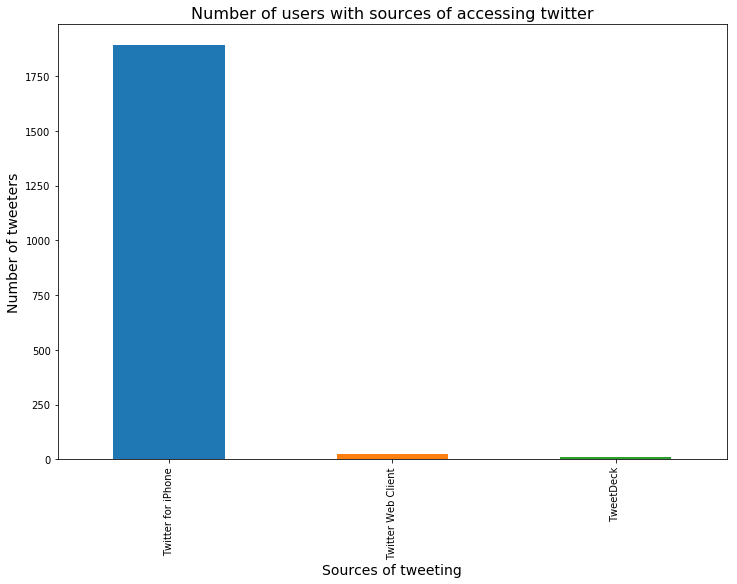

In [80]:
source = df['source'].value_counts()
source.plot.bar(figsize = (12,8))
plt.xlabel('Sources of tweeting', fontsize=14)
plt.ylabel('Number of tweeters', fontsize=14)
plt.title('Number of users with sources of accessing twitter', fontsize=16)
plt.show()

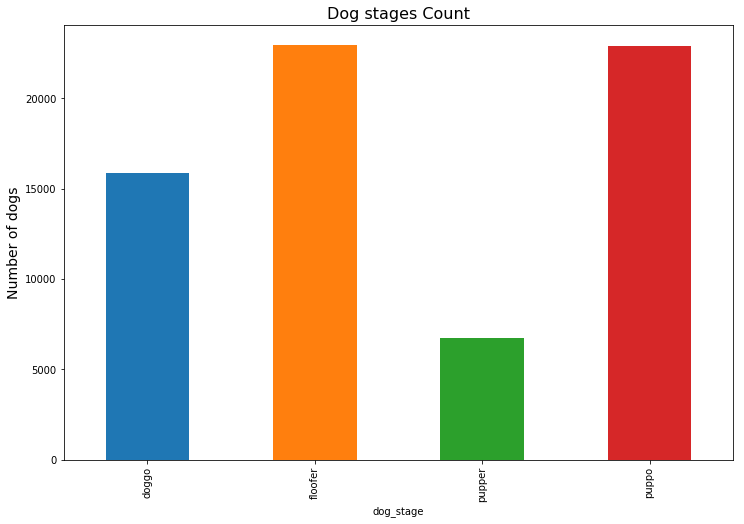

In [81]:
dog_stages = df['dog_stage'].value_counts()
dog_stages.plot.bar(figsize = (12,8))
dog_stage_fav_avg.plot.bar(figsize = (12,8))
plt.ylabel('Dog stages', fontsize=14)
plt.ylabel('Number of dogs', fontsize=14)
plt.title('Dog stages Count', fontsize=16)
plt.show()

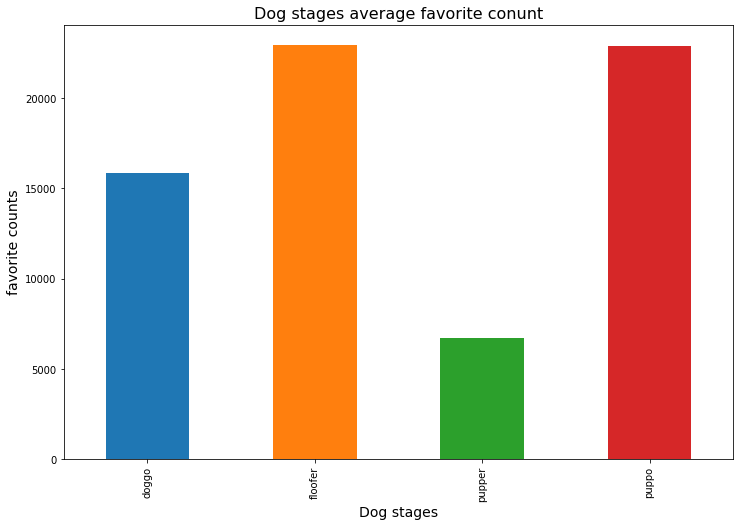

In [82]:
avgdpr = twitter.query('dog_stage in ["doggo", "floofer", "puppo", "pupper"]')
dog_stage_fav_avg = avgdpr.groupby('dog_stage')['favorite_count'].mean()
dog_stage_fav_avg.plot.bar(figsize = (12,8))
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('favorite counts', fontsize=14)
plt.title('Dog stages average favorite conunt', fontsize=16)
plt.show()